In [1565]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [1566]:
dataset = pd.read_csv("./datasets/CAR DETAILS FROM CAR DEKHO.csv")
dataset.head()
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Tata Tiago 1.2 Revotron XZA,2019,350000,15000,Petrol,Individual,Automatic,Second Owner
1,Hyundai EON Magna Plus,2016,220000,43700,Petrol,Individual,Manual,First Owner
2,Volkswagen Polo GTI,2017,825000,13599,Petrol,Dealer,Automatic,First Owner
3,Maruti Swift LXi BSIV,2008,200000,50000,Petrol,Individual,Manual,First Owner
4,Chevrolet Beat LT,2013,200000,50000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
4335,Honda City i VTEC S,2014,500000,60000,Petrol,Individual,Manual,First Owner
4336,Toyota Corolla Altis G,2011,500000,40000,Petrol,Individual,Manual,Second Owner
4337,Nissan Sunny XL,2012,300000,80000,Petrol,Individual,Manual,Second Owner
4338,Chevrolet Sail Hatchback 1.3 TCDi LT ABS,2014,250000,120000,Diesel,Individual,Manual,First Owner


In [1567]:
dataset = dataset.drop(columns=["name"])
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2019,350000,15000,Petrol,Individual,Automatic,Second Owner
1,2016,220000,43700,Petrol,Individual,Manual,First Owner
2,2017,825000,13599,Petrol,Dealer,Automatic,First Owner
3,2008,200000,50000,Petrol,Individual,Manual,First Owner
4,2013,200000,50000,Petrol,Individual,Manual,First Owner


In [1568]:
to_be_encoded = dataset[["fuel", "seller_type", "transmission", "owner"]]
to_be_encoded.head()

,fuel,seller_type,transmission,owner
0,Petrol,Individual,Automatic,Second Owner
1,Petrol,Individual,Manual,First Owner
2,Petrol,Dealer,Automatic,First Owner
3,Petrol,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner


In [1569]:
oe = OrdinalEncoder()
encoded_columns = oe.fit_transform(to_be_encoded)
encoded_columns[:5]

array([[4., 1., 0., 2.],
       [4., 1., 1., 0.],
       [4., 0., 0., 0.],
       [4., 1., 1., 0.],
       [4., 1., 1., 0.]])

In [1570]:
encoded_columns = pd.DataFrame(encoded_columns, columns=[["fuel", "seller_type", "transmission", "owner"]])
encoded_columns.head()

,fuel,seller_type,transmission,owner
0,4.0,1.0,0.0,2.0
1,4.0,1.0,1.0,0.0
2,4.0,0.0,0.0,0.0
3,4.0,1.0,1.0,0.0
4,4.0,1.0,1.0,0.0


In [1571]:
dataset[["fuel", "seller_type", "transmission", "owner"]] = encoded_columns
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2019,350000,15000,4.0,1.0,0.0,2.0
1,2016,220000,43700,4.0,1.0,1.0,0.0
2,2017,825000,13599,4.0,0.0,0.0,0.0
3,2008,200000,50000,4.0,1.0,1.0,0.0
4,2013,200000,50000,4.0,1.0,1.0,0.0


In [1572]:
corr_matrix = dataset.corr()
corr_matrix["fuel"].sort_values(ascending=False)

fuel             1.000000
transmission     0.039249
seller_type      0.038797
owner           -0.010910
year            -0.120002
selling_price   -0.269653
km_driven       -0.286095
Name: fuel, dtype: float64

In [1573]:
y = dataset["selling_price"]
y = y.to_numpy()
y[:5]
dataset = dataset.drop(columns=["selling_price"])

# choosing which columns to exclude
#dataset = dataset.drop(columns=["transmission"])
#dataset = dataset.drop(columns=["owner"])
#dataset = dataset.drop(columns=["fuel"])

print(dataset.head())
X = dataset.to_numpy()
X.shape, y.shape

   year  km_driven  fuel  seller_type  transmission  owner
0  2019      15000   4.0          1.0           0.0    2.0
1  2016      43700   4.0          1.0           1.0    0.0
2  2017      13599   4.0          0.0           0.0    0.0
3  2008      50000   4.0          1.0           1.0    0.0
4  2013      50000   4.0          1.0           1.0    0.0


((4340, 6), (4340,))

In [1574]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3255, 6), (1085, 6), (3255,), (1085,))

In [1575]:
# conversion to tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3255, 6]),
 torch.Size([1085, 6]),
 torch.Size([3255]),
 torch.Size([1085]))

In [1576]:
# correct shape
y_train = y_train.view(y_train.shape[0], -1)
y_test = y_test.view(y_test.shape[0], -1)
y_train.shape, y_test.shape

(torch.Size([3255, 1]), torch.Size([1085, 1]))

In [1577]:
class DavNet(nn.Module):
    
    def __init__(self, n_features, output_size):
        super(DavNet, self).__init__()
        self.linear = nn.Linear(n_features, output_size)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

loss: 190942642176.00000: 100%|██████████████████████████████████████████████████████| 1105/1105 [00:00<00:00, 1223.31it/s]


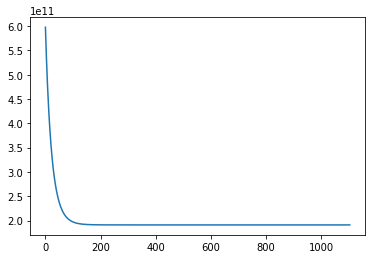

In [1578]:
learning_rate = 0.01
n_features, output_size = X_train.shape[1], 1
model = DavNet(n_features, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 1105
losses = []

for epoch in (t := trange(n_epochs)):
    
    optimizer.zero_grad()
    
    y_predictions = model(X_train)
    
    loss = criterion(y_predictions, y_train)
    
    loss.backward()
    
    optimizer.step()
   
    losses.append(loss.item())
    
    t.set_description("loss: %.5f" % (loss.item()))
    
plt.plot(losses)

In [1579]:
predictions = model(X_test).detach().numpy()
errors = np.abs(y_test.numpy()-predictions)
print(errors.mean(), errors.min(), errors.max())

from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

234262.95 29.125 3203359.8
165175800000.0
234262.95
406418.25


In [1586]:
from random import randint
predictions[randint(0,len(predictions))], y_test[randint(0,len(predictions))]

(array([671673.5], dtype=float32), tensor([660000.]))